# Clustering

In [211]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [212]:
def inter (model):
    return sum(np.linalg.norm(center - model.cluster_centers_.mean(axis=0)) 
                             for center in model.cluster_centers_)
def intra (model):
    return model.inertia_

## Manipulatie

In [213]:
data = pd.read_csv("./Titanic-Dataset.csv")
median = data["Age"].median()
data["Age"] = data["Age"].fillna(median)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [214]:
data = data.loc[:, ["Sex", "Pclass", "Age", "Survived"]]
data["Pclass"] = data["Pclass"].astype(str)
data["Survived"] = data["Survived"].astype(str)
data

,Sex,Pclass,Age,Survived
0,male,3,22.0,0
1,female,1,38.0,1
2,female,3,26.0,1
3,female,1,35.0,1
4,male,3,35.0,0
...,...,...,...,...
885,female,3,39.0,0
886,male,2,27.0,0
887,female,1,19.0,1
888,male,1,26.0,1


In [215]:
dummie = pd.get_dummies(data.loc[:, ["Sex", "Pclass", "Survived"]])
data = pd.concat([data, dummie], axis=1)
data = data.drop(["Sex", "Pclass", "Survived"], axis=1)
data

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Survived_0,Survived_1
0,22.0,False,True,False,False,True,True,False
1,38.0,True,False,True,False,False,False,True
2,26.0,True,False,False,False,True,False,True
3,35.0,True,False,True,False,False,False,True
4,35.0,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...
885,39.0,True,False,False,False,True,True,False
886,27.0,False,True,False,True,False,True,False
887,19.0,True,False,True,False,False,False,True
888,26.0,False,True,True,False,False,False,True


## Trainen

In [216]:
clusterModel = KMeans(n_clusters=3, random_state=42)
clusterModel.fit_predict(data)

array([0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2,

In [217]:
result = pd.DataFrame(clusterModel.cluster_centers_)
result

,0,1,2,3,4,5,6,7
0,14.645758,0.415584,0.584416,0.125541,0.177489,0.696970,0.575758,0.424242
1,51.066667,0.320000,0.680000,0.506667,0.226667,0.266667,0.633333,0.366667
2,29.646365,0.332024,0.667976,0.218075,0.214145,0.567780,0.628684,0.371316


### Inter

In [218]:
inter(clusterModel)

38.56795935536683

### Intra

In [219]:
intra(clusterModel)

31453.840950725873

In [220]:
def findBestN(startValue, data, higestInter, lowestIntra):
    clusterModel = KMeans(n_clusters=startValue, random_state=42)
    clusterModel.fit_predict(data)
    
    currentInter = sum(np.linalg.norm(center - clusterModel.cluster_centers_.mean(axis=0)) 
                             for center in clusterModel.cluster_centers_)
    currentIntra = clusterModel.inertia_

    if higestInter > currentInter and lowestIntra < currentIntra:
        return startValue
    else:
        if len(data) < startValue + 1:
            return startValue
        else:
            return findBestN(startValue + 1, data, currentInter, currentIntra)

In [221]:
findBestN(3, data, 38.56795935536683, 31453.840950725873)

351

In [222]:
clusterModel = KMeans(n_clusters= 352, random_state=42)
clusterModel.fit_predict(data)

array([ 23, 141, 204,  55,  19,   9, 167, 114,  35, 135,  59,  37,  68,
       137, 181,   2, 114, 136, 154,  47, 249, 243,  45, 130, 289, 250,
         9, 133,  47,   9,  12,   3,  47, 184,  41, 245,  61,  65,  88,
       298, 235, 272,   9, 189, 223,   9,   9,  47,   9,  88,  76,  65,
       149,  54, 233, 130, 287, 327, 319,  53,  23, 141,  30,   4,  41,
        61,  54,  14, 293,  90, 325, 285, 127,  90,  66,  17,   9,   9,
       341, 291,  23, 195,  47,  41, 143, 242,   0,   9, 218,  97, 170,
        68, 199,  90,  49,   9, 110, 166, 178,  58,  62,   9, 273,  38,
       246,   9, 103,  61,  48,  47,  34, 326,  23, 253, 220,  65, 217,
       172, 174,  39, 127,   9, 156, 330, 167, 158,   9, 267,  47, 124,
        38,  68, 281,  54,  60,  73, 186,  96,   0, 174,  62, 119,  67,
        14,  81, 196, 232,  16, 337, 140,  46,   5, 180, 324,   9, 129,
        24,  42,   9,   9,  72,  80,  90,  85, 201,  89,   3,  86,  41,
         9,  63,   4,  99,  65,  15, 108,   9, 206,  22, 126,  6

In [223]:
inter(clusterModel)

4804.7745244751795

In [224]:
intra(clusterModel)

5400.0

Met minder atributen

In [225]:
data.drop(["Sex_female", "Sex_male", "Pclass_1", "Pclass_2", "Pclass_3"], axis=1)

,Age,Survived_0,Survived_1
0,22.0,True,False
1,38.0,False,True
2,26.0,False,True
3,35.0,False,True
4,35.0,True,False
...,...,...,...
885,39.0,True,False
886,27.0,True,False
887,19.0,False,True
888,26.0,False,True


In [226]:
clusterModel = KMeans(n_clusters= 3, random_state=42)
clusterModel.fit_predict(data)
inter(clusterModel)


38.56795935536683

In [227]:
intra(clusterModel)

31453.840950725873

In [228]:
findBestN(3, data, 38.56795935536683, 31453.840950725873)


352

In [229]:
clusterModel = KMeans(n_clusters= 351, random_state=42)
clusterModel.fit_predict(data)
inter(clusterModel)


5080.60248356182

In [230]:
intra(clusterModel)

2.3126489735004153e-28

# GreatOutDoors

In [231]:
import pyodbc

DB = {'servername' : 'MSI\\SQLEXPRESS',
      'database' : 'GreatOutdoorsDatawareHouse1'}
export_conn = pyodbc.connect('DRIVER={SQL server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')
   

data = pd.read_sql_query("SELECT * FROM sales_branch_table", export_conn)
data

,S_KEY,sales_branch_code,country,region,city,postal_zone,adress1,adress2
0,1,13,Germany,None,Hamburg,D-22529,Schwabentor 35,None
1,2,14,Germany,None,München,D-81241,Leopoldstraße 36,None
2,3,15,Sweden,None,Kista,S-164 40,Isafjordsgatan 30 C,None
3,4,17,Canada,Alberta,Calgary,T2P 3Z0,"7800, 756 - 6th Avenue. S.W.",None
4,5,18,Canada,Ontario,Toronto,M2M 4K8,789 Yonge Street,None
5,6,19,United States,Massachusetts,Boston,02133,1288 Dorchester Avenue,None
6,7,20,United States,Washington,Seattle,98139,299 Yale Avenue,None
7,8,21,United States,California,Los Angeles,90072,1288 South Barrington Ave.,None
8,9,22,United States,Florida,Miami,33024,10032 NW 186th,None
9,10,23,France,None,Lyon,F-69002,"6c, rue de l'Église",None


## manipulatie

In [232]:
data = data.drop(["S_KEY", "sales_branch_code", "postal_zone",	"adress1", "adress2"], axis=1)

data = pd.get_dummies(data)
data

,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Canada,country_China,country_Finland,country_France,country_Germany,country_Italy,...,city_Paris,city_San Chung,city_Seattle,city_Seoul,city_Shanghai,city_São Paulo,city_Tokyo,city_Toronto,city_Wien,city_Zürich
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
clusterModel = KMeans(n_clusters=2, random_state=42)
clusterModel.fit_predict(data)


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

Intra

In [234]:
intra(clusterModel)

64.62564102564104

Inter

In [235]:
inter(clusterModel)

1.199320429974454

In [236]:
findBestN(2, data, 1.199320429974454, 64.62564102564104)

28

In [237]:
clusterModel = KMeans(28, random_state=42)
clusterModel.fit_predict(data)

array([26,  2, 12, 25,  5, 14,  3, 15, 13,  8,  0,  4, 22, 17, 10,  9, 20,
       18,  6, 24,  1, 21, 11, 16, 19, 27, 23,  7])

In [238]:
inter(clusterModel)

45.581746053009354

In [239]:
intra(clusterModel)

0.0

In [243]:
DB = {'servername' : 'MSI\\SQLEXPRESS',
      'database' : 'GreatOutdoorsDatawareHouse1'}
export_conn = pyodbc.connect('DRIVER={SQL server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')
   

data = pd.read_sql_query("SELECT * FROM sales_branch_table", export_conn)
data
data = data.drop(["S_KEY", "sales_branch_code", "postal_zone", "city",	"adress1", "adress2"], axis=1)

data = pd.get_dummies(data)
data

,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Canada,country_China,country_Finland,country_France,country_Germany,country_Italy,...,region_Noord-Holland,region_Ontario,region_Osaka,region_SP,region_Taipei,region_Tokyo,region_VIC,region_Vizcaya,region_Washington,region_West Midlands
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [244]:
clusterModel = KMeans(n_clusters=2, random_state=42)
clusterModel.fit_predict(data)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0])

In [245]:
inter(clusterModel)

1.1378838913370581

In [246]:
intra(clusterModel)

38.62564102564103

In [247]:
findBestN(2, data, 1.1378838913370581, 38.62564102564103)

28

In [250]:
clusterModel = KMeans(n_clusters=28, random_state=42)
clusterModel.fit_predict(data)

array([ 6,  6, 22,  5, 12,  3, 14, 21, 13,  9,  0, 15,  4, 16,  2,  8, 23,
       10, 11, 20,  1, 19, 17, 18, 25,  9, 24,  7])

In [251]:
inter(clusterModel)

36.217115506573904

In [252]:
intra(clusterModel)

0.0

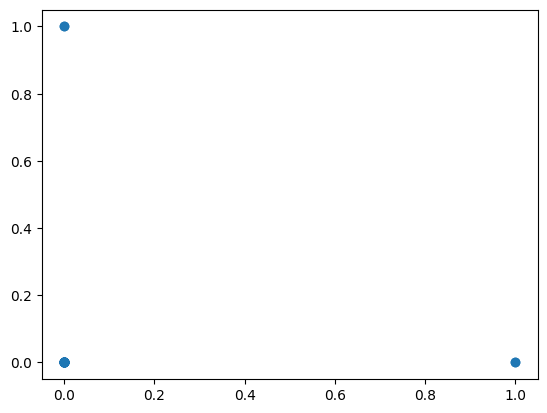

In [263]:
plt.scatter(clusterModel.cluster_centers_[0], clusterModel.cluster_centers_[1])